In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [259]:
results = pd.read_csv('results.csv')
results = results.query("simp_algorithm == ['OS','RDP','VW','BU']")
results["dataset"] = results["dataset"].apply(lambda x: x.replace("TEST_normalized", ""))
results["model"] = results["model"].apply(lambda x: x.split(".")[0].replace("_norm", ""))
results.head(5)

,dataset,model,simp_algorithm,performance,"knee(x,y)",time
1,ProximalPhalanxOutlineCorrect,logistic-regression,BU,0.447152,"(0.04443037974683545, 0.0)",0.282440
2,ProximalPhalanxOutlineCorrect,logistic-regression,VW,0.872785,"(1.0, 1.0)",0.016343
3,ProximalPhalanxOutlineCorrect,logistic-regression,RDP,0.896519,"(0.13151898734177217, 1.0)",0.564307
6,ItalyPowerDemand,logistic-regression,BU,0.662132,"(0.14608695652173911, 0.4471744471744472)",0.051812
8,MoteStrain,decision-tree,BU,0.987952,"(1.0120481927710847, 1.0)",0.310772


In [260]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc   val_acc  test_acc  \
0        decision-tree   1.000000  0.583333  0.668966   
1  logistic-regression   0.681462  0.625000  0.593103   
2                  cnn   0.940313  0.977188  1.000000   
3        decision-tree   0.150838  0.089888  0.091178   
4  logistic-regression   0.139665  0.089888  0.107756   
5                  knn   1.000000  0.842697  0.242747   

                       dataset  
0  MiddlePhalanxOutlineCorrect  
1  MiddlePhalanxOutlineCorrect  
2  MiddlePhalanxOutlineCorrect  
3                      FaceAll  
4                      FaceAll  
5                      FaceAll  


In [261]:
metadata = pd.read_csv("../data/DataSummary.csv")
metadata = metadata.rename(columns={"Name": "dataset"})
metadata = metadata.drop("Data donor/editor", axis=1)
print(metadata.head(5))


   ID       Type    dataset  Train   Test   Class  Length  ED (w=0)  \
0   1      Image      Adiac     390    391     37     176    0.3887   
1  90  Simulated        BME      30    150      3     128    0.1667   
2   7  Simulated        CBF      30    900      3     128    0.1478   
3  91    Traffic  Chinatown      20    343      2      24    0.0466   
4  92      Image       Crop    7200  16800     24      46    0.2883   

  DTW (learned_w)   DTW (w=100)  Default rate  
0       0.3913 (3)       0.3964        0.9591  
1       0.0200 (4)       0.1000        0.6667  
2      0.0044 (11)       0.0033        0.6644  
3       0.0466 (0)       0.0437        0.2741  
4       0.2883 (0)       0.3348        0.9583  


## All Results

In [262]:
datasets = [dataset.replace("TEST_normalized", "") for dataset in results['dataset'].unique()]
print(f"List of all Datasets {' '.join(datasets)}")
print(f"Number of Datasets: {len(results['dataset'].unique())}")
print(results['model'].unique())
print(len(results['model'].unique()))
print(results['simp_algorithm'].unique())
print(len(results['simp_algorithm'].unique()))

List of all Datasets ProximalPhalanxOutlineCorrect ItalyPowerDemand MoteStrain GunPointOldVersusYoung MiddlePhalanxTW ECG200 SonyAIBORobotSurface1 ElectricDevices BME Chinatown DistalPhalanxOutlineAgeGroup MedicalImages TwoPatterns UMD ECG5000 TwoLeadECG GunPointAgeSpan MiddlePhalanxOutlineAgeGroup ProximalPhalanxOutlineAgeGroup ProximalPhalanxTW SmoothSubspace Plane ECGFiveDays GunPoint PowerCons GunPointMaleVersusFemale PhalangesOutlinesCorrect DistalPhalanxOutlineCorrect Wafer Crop FaceAll Adiac SyntheticControl
Number of Datasets: 33
['logistic-regression' 'decision-tree' 'knn' 'cnn']
4
['BU' 'VW' 'RDP' 'OS']
4


#### Sum AULC

In [263]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU: ", bu_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  49.00622118441517
RDP:  58.581797531770874
BU:  63.11181339317061
VW:  63.99853988105596


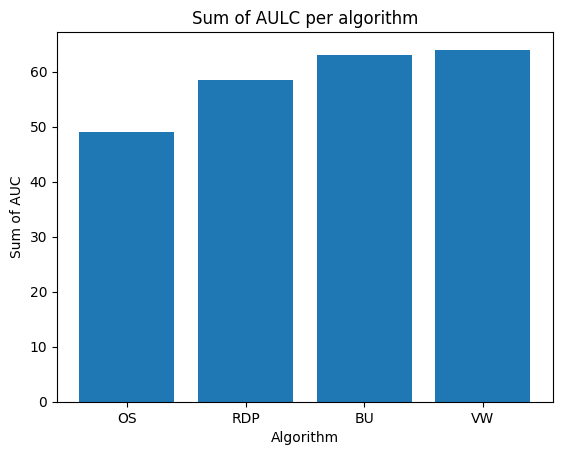

In [264]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [265]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU: ", bu_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.6534162824588688
RDP:  0.7608025653476737
BU:  0.8196339401710468
VW:  0.8311498685851424


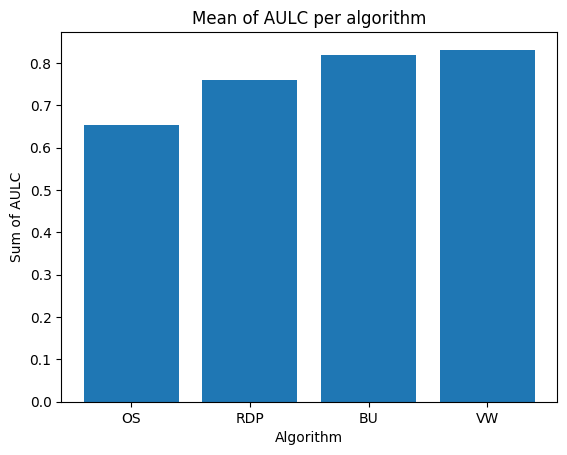

In [266]:
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, vw_alg_mean_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

#### Mean AULC Per Alg and Model

In [267]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU: ", bu_alg_all_per_model)
print("VC: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn                    0.749753
decision-tree          0.581984
knn                    0.593478
logistic-regression    0.648783
Name: performance, dtype: float64
RDP:  model
cnn                    0.799840
decision-tree          0.663398
knn                    0.760633
logistic-regression    0.803913
Name: performance, dtype: float64
BU:  model
cnn                    0.887784
decision-tree          0.726481
knn                    0.830027
logistic-regression    0.813048
Name: performance, dtype: float64
VC:  model
cnn                    0.831961
decision-tree          0.768100
knn                    0.845771
logistic-regression    0.877545
Name: performance, dtype: float64


/tmp/ipykernel_323567/2727764743.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_323567/2727764743.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_323567/2727764743.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_323567/2727764743.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)


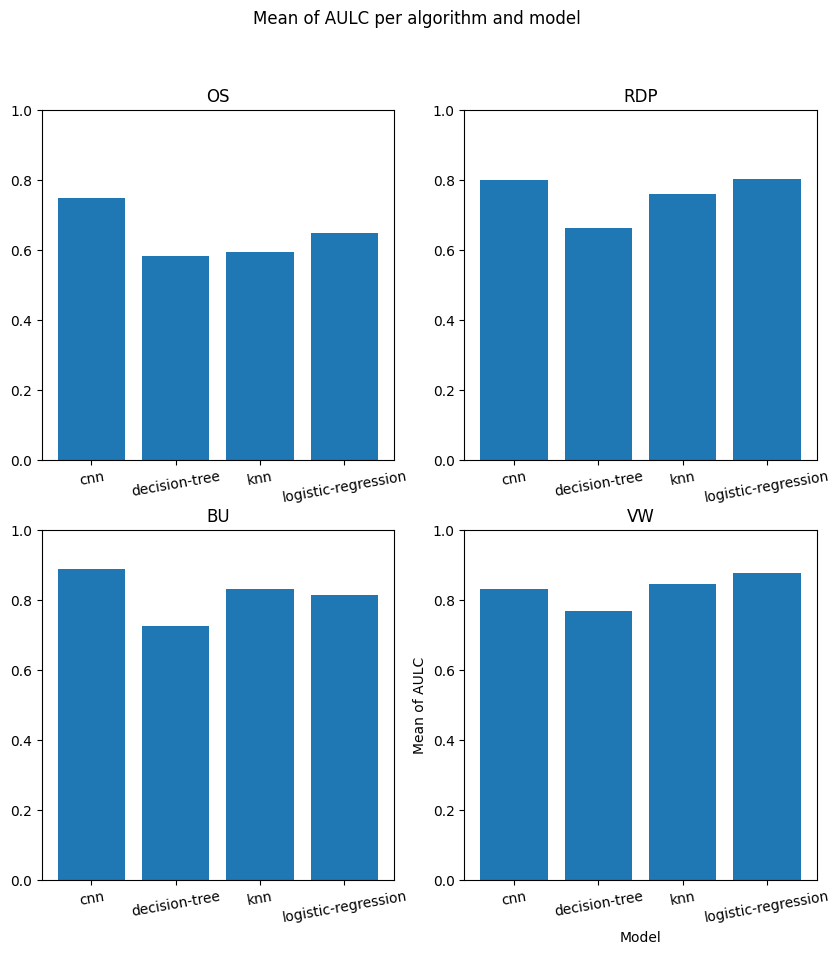

In [268]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)

plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [269]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.911976
decision-tree          0.667024
knn                    0.999654
logistic-regression    0.563943
Name: train_acc, dtype: float64

#### Train Accuracy

Text(0, 0.5, 'Mean of Train Accuracy')

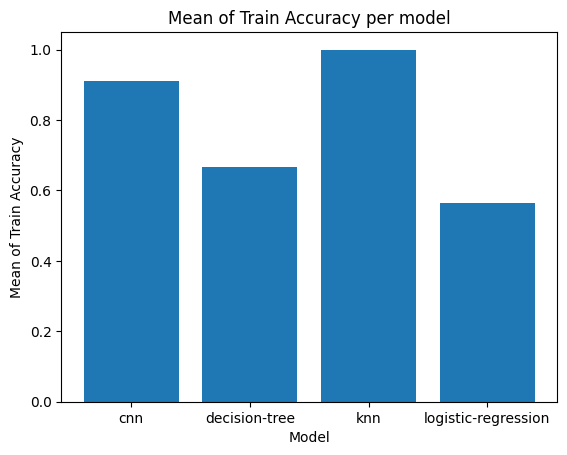

In [270]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values) #type: ignore 
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

#### Validation Accuracy

In [271]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.722830
decision-tree          0.453751
knn                    0.641949
logistic-regression    0.460965
Name: val_acc, dtype: float64

Text(0, 0.5, 'Mean of Validation Accuracy')

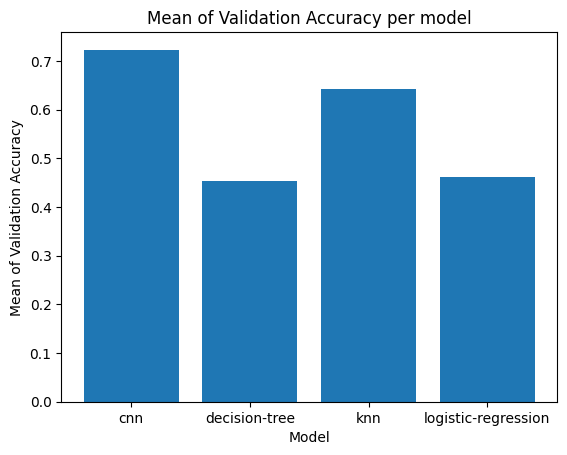

In [272]:
plt.bar(models_mean_perf_val.index, models_mean_perf_val.values)    #type: ignore
plt.title('Mean of Validation Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Validation Accuracy')

### By Class

In [273]:
dataset_class = metadata[["dataset", "Class"]].to_dict()
dataset_class_dict = pd.Series(metadata["Class"].values, index=metadata["dataset"].values).to_dict()
print(dataset_class_dict)
#models_df["class"] = models_df["dataset"].map()

{'Adiac': 37, 'BME': 3, 'CBF': 3, 'Chinatown': 2, 'Crop': 24, 'DistalPhalanxOutlineAgeGroup': 3, 'DistalPhalanxOutlineCorrect': 2, 'DistalPhalanxTW': 6, 'ECG200': 2, 'ECG5000': 5, 'ECGFiveDays': 2, 'ElectricDevices': 7, 'FaceAll': 14, 'FacesUCR': 14, 'GunPoint': 2, 'GunPointAgeSpan': 2, 'GunPointMaleVersusFemale': 2, 'GunPointOldVersusYoung': 2, 'ItalyPowerDemand': 2, 'MedicalImages': 10, 'MiddlePhalanxOutlineAgeGroup': 3, 'MiddlePhalanxOutlineCorrect': 2, 'MiddlePhalanxTW': 6, 'MoteStrain': 2, 'PhalangesOutlinesCorrect': 2, 'Plane': 7, 'PowerCons': 2, 'ProximalPhalanxOutlineAgeGroup': 3, 'ProximalPhalanxOutlineCorrect': 2, 'ProximalPhalanxTW': 6, 'SmoothSubspace': 3, 'SonyAIBORobotSurface1': 2, 'SonyAIBORobotSurface2': 2, 'SwedishLeaf': 15, 'SyntheticControl': 6, 'TwoLeadECG': 2, 'TwoPatterns': 4, 'UMD': 3, 'Wafer': 2}


In [274]:
models_class_df = models_df
models_class_df["class"] = models_class_df["dataset"].map(dataset_class_dict)
models_class_df

,model_type,train_acc,val_acc,test_acc,dataset,class
0,decision-tree,1.000000,0.583333,0.668966,MiddlePhalanxOutlineCorrect,2
1,logistic-regression,0.681462,0.625000,0.593103,MiddlePhalanxOutlineCorrect,2
2,cnn,0.940313,0.977188,1.000000,MiddlePhalanxOutlineCorrect,2
3,decision-tree,0.150838,0.089888,0.091178,FaceAll,14
4,logistic-regression,0.139665,0.089888,0.107756,FaceAll,14
...,...,...,...,...,...,...
150,cnn,0.992105,0.994583,0.959732,SmoothSubspace,3
151,decision-tree,0.257576,0.176471,0.278846,Plane,7
152,logistic-regression,0.242424,0.176471,0.288462,Plane,7
153,knn,1.000000,0.411765,0.990385,Plane,7


#### Train Accuracy

In [275]:
models_mean_perf_train_per_class = models_class_df
models_mean_perf_train_per_class = models_mean_perf_train_per_class.groupby(["model_type", "class"])["train_acc"].mean()

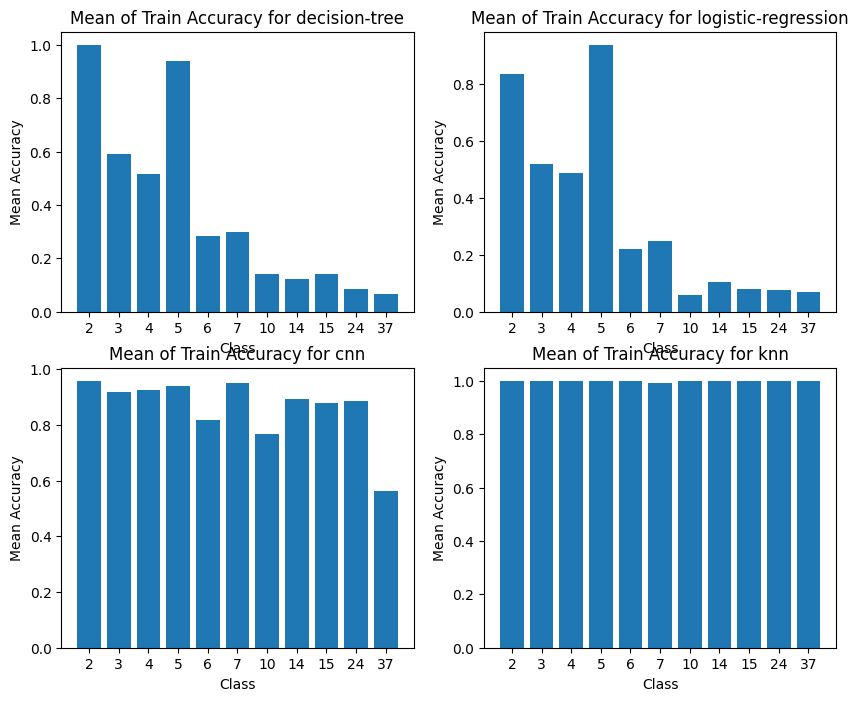

In [276]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_train_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Train Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

#### Validation Accuracy

In [277]:
models_mean_perf_val_per_class = models_class_df
models_mean_perf_val_per_class = models_mean_perf_val_per_class.groupby(["model_type", "class"])["val_acc"].mean()

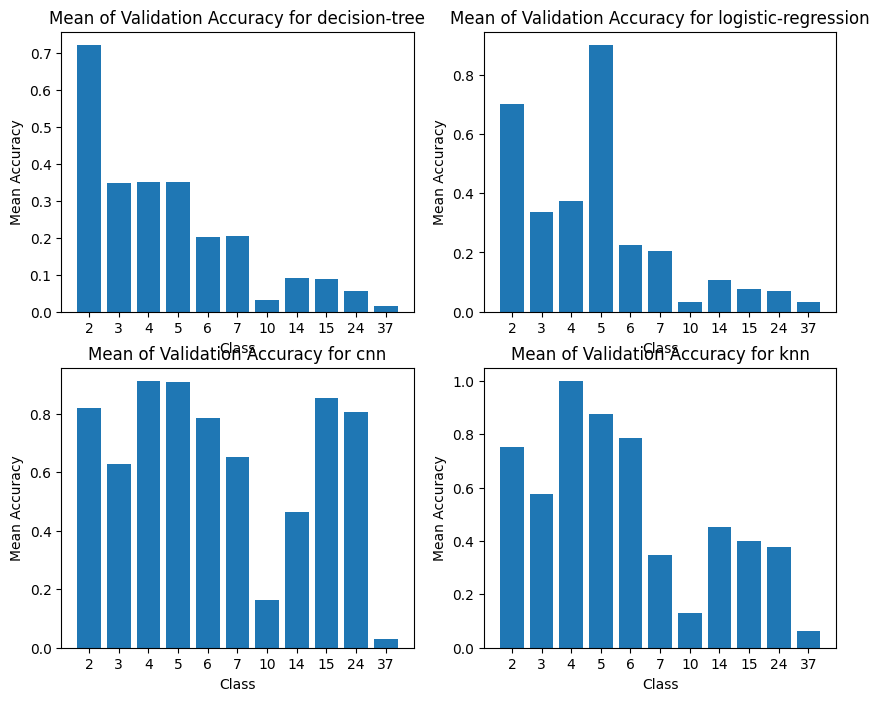

In [278]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_val_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Validation Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

## Only for CNN

In [279]:
results_cnn = results.query('model == "cnn"')

#### Sum AULC

In [280]:
os_alg_sum_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU"')["performance"].sum()
vw_alg_sum_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_cnn)
print("RDP: ", rdp_alg_sum_cnn)
print("BU: ", bu_alg_sum_cnn)
print("VW: ", vw_alg_sum_cnn)

Sum of AULC per algorithm
OS:  17.994063656321792
RDP:  19.19615948262836
BU:  21.30681665971098
VW:  19.967068677951833


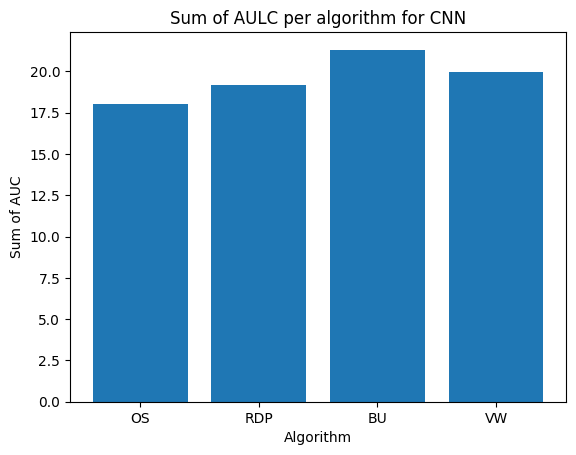

In [281]:
sum_auc = [os_alg_sum_cnn, rdp_alg_sum_cnn, bu_alg_sum_cnn, vw_alg_sum_cnn]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for CNN')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [282]:
os_alg_mean_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU"')["performance"].mean()
vw_alg_mean_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_cnn)
print("RDP: ", rdp_alg_mean_cnn)
print("BU: ", bu_alg_mean_cnn)
print("VW: ", vw_alg_mean_cnn)

Mean of AUC per algorithm
OS:  0.7497526523467414
RDP:  0.7998399784428484
BU:  0.8877840274879575
VW:  0.8319611949146597


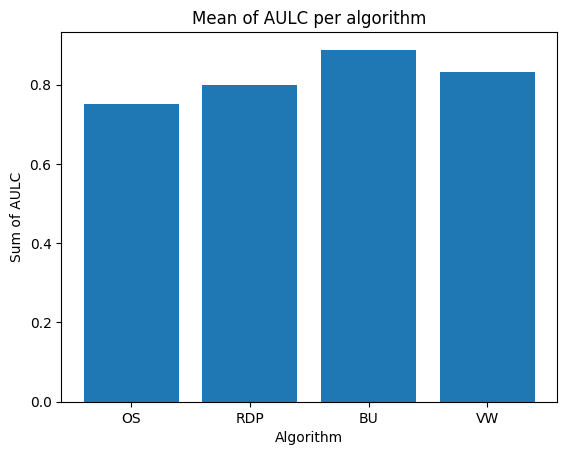

In [283]:
sum_auc = [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_alg_mean_cnn, vw_alg_mean_cnn]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

### By Class:

In [284]:
results_cnn_class = results_cnn
results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)
print(results_cnn_class.head(5))

         dataset model simp_algorithm  performance  \
267  ECGFiveDays   cnn             BU     0.972721   
268  ECGFiveDays   cnn             VW     0.945735   
269  ECGFiveDays   cnn            RDP     0.944485   
270  ECGFiveDays   cnn             OS     0.929154   
271     GunPoint   cnn             OS     0.862009   

                      knee(x,y)  time  class  
267  (0.05088235294117645, 1.0)   0.0      2  
268                  (1.0, 1.0)   0.0      2  
269  (0.03860294117647054, 1.0)   0.0      2  
270  (0.05919117647058817, 1.0)   0.0      2  
271   (0.2561999999999998, 1.0)   0.0      2  


/tmp/ipykernel_323567/1616543764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)


#### AULC Per Alg and Class

In [285]:
results_cnn_alg_class = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].mean()
print(results_cnn_alg_class)

simp_algorithm  class
BU              2        0.901954
                3        0.899960
                4        0.954585
                6        0.872684
                7        0.902912
                10       0.899079
                14       0.686615
                24       0.909118
                37       0.816159
OS              2        0.728752
                3        0.838688
                4        0.622088
                6        0.803419
                7        0.615123
                10       0.819948
                14       0.707193
                24       0.631925
                37       0.820197
RDP             2        0.805306
                3        0.852688
                4        0.605649
                6        0.804392
                7        0.661262
                10       0.917041
                14       0.786838
                24       0.810482
                37       0.829251
VW              2        0.848464
                3        0

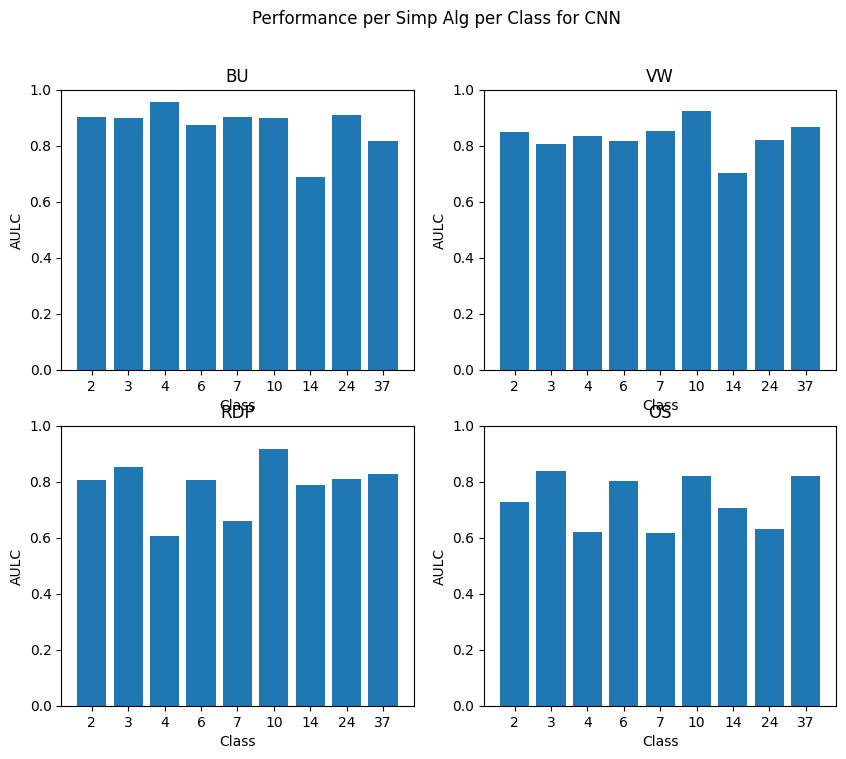

In [286]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_class[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

## "Optimal" Knee

In [287]:
datasets = results_cnn['dataset'].unique()

for dataset in datasets:
    dat_df = results.query(f'dataset == "{dataset}"')
    simp_algorithms = dat_df['simp_algorithm']
    #print(simp_algorithms)
    knees_df = dat_df["knee(x,y)"]
    #comb = zip(simp_algorithms, knees_df)
    knees = [[float(knee.replace("(", "").replace(")", "").split(",")[0]), float(knee.replace("(", "").replace(")", "").split(",")[1])] for knee in knees_df]

    x_values = [x for x, y in knees]
    y_values = [y for x, y in knees]

    min_x = min(x_values)
    min_x_index = x_values.index(min_x)
    y = y_values[min_x_index]

    y_max = max(y_values)
    if y == y_max:
        #sim_alg = simp_algorithms[min_x_index]
        print(f"Best model for {dataset} is {dat_df['model'].values[0]}, simp alg.  with AUC {y} at knee points {min_x, y}")
    

Best model for ECGFiveDays is cnn, simp alg.  with AUC 1.0 at knee points (0.03860294117647054, 1.0)
Best model for Wafer is cnn, simp alg.  with AUC 1.0 at knee points (0.016447368421052613, 1.0)
Best model for ElectricDevices is knn, simp alg.  with AUC 1.0 at knee points (0.16768421052631577, 1.0)
Best model for BME is decision-tree, simp alg.  with AUC 1.0 at knee points (0.021102362204724407, 1.0)
Best model for TwoPatterns is decision-tree, simp alg.  with AUC 1.0 at knee points (0.05244094488188976, 1.0)
